# Import necessary libraries

In [543]:
import numpy as np
import pandas as pd

# Data Viszualization libs
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, Markdown, Latex

**NOTE:** Please change the path to read the file.

In [544]:
# Initialize DataFrame object
#
file_path = "loan.csv"
df = pd.read_csv(file_path)

# Check data
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Data Understanding, Cleaning and Manipulation

### Removing Unnecessary Columns

In [545]:
# Irrelvant Columns which should be dropped to make the dataset more manageable.
# ==============================================================================
#
# Columns: id, member_d, url
#
# Reason: These are identifiers which are unrelated to business and are just generated by datastore used.
#         They cannot be considered as variables for analysis.
#
df.drop(columns = ['id', 'member_id', 'url'], axis = 1, inplace = True)

# Columns: pymnt_plan, initial_list_status, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code,
#          application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, 
#          tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, 
#          total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, 
#          total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, 
#          chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, 
#          mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, 
#          mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, 
#          num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, 
#          num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, pct_tl_nvr_dlq, percent_bc_gt_75, tax_liens, 
#          tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit
#
# Reason: There is only one/invalid value for all rows and cannot be considered as variable.
#
columns = ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']
df.drop(columns = columns, axis = 1, inplace = True)

# Columns: title
#
# Reason: This are no standardised values so cannot be grouped/aggegated.
#
df.drop(columns = ['title'], axis = 1, inplace = True)

# Columns: recoveries, collection_recovery_fee
#
# Reason: These are system related fields.
#
df.drop(columns = ['recoveries', 'collection_recovery_fee'], axis = 1, inplace = True)

# Columns: emp_title
#
# Reason: This has different set of values for the same title. E.g. "7 Eleven", "7-eleven", etc.
#         These values can be corrected and standardized, but the insights gained will be at particular
#         Customer level, and might not be that useful. So it can be dropped.
#
df.drop(columns = ['emp_title'], axis = 1, inplace = True)
# NOTE: We will keep 'desc' column and convert it into boolean (desc provided or not) and derive insights.

# Columns: funded_amnt, funded_amnt_inv
#
# Reason: They have almost similar data as loan_amnt
df.drop(columns = ['funded_amnt', 'funded_amnt_inv'], axis = 1, inplace = True)

# Columns: total_pymnt_inv, total_rec_prncp
#
# Reason: They have almost similar data as total_pymnt
df.drop(columns = ['total_pymnt_inv', 'total_rec_prncp'], axis = 1, inplace = True)

# Columns: delinq_2yrs, out_prncp, out_prncp_inv, total_pymnt
#
# Reason: These columns show data only after the charge off has already happened. So they won't generate
#         any useful insight in determining defaulters.
df.drop(columns = ['delinq_2yrs', 'out_prncp', 'out_prncp_inv'], axis = 1, inplace = True)

# Columns: next_pymnt_d, revol_bal, total_pymnt, total_rec_int
#          last_pymnt_d, last_pymnt_amnt, last_credit_pull_d
#
# Reason: These columns are not directly related to determining a default.
df.drop(columns = ['next_pymnt_d', 'revol_bal', 'total_pymnt', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], axis = 1, inplace = True)
# NOTE: We will keep 'total_rec_late_fee' and convert it into a boolean (late payments done/not done) and compare
#       whether late payers charge off and derive other insights from it.

# print remaining columns
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   term                    39717 non-null  object 
 2   int_rate                39717 non-null  object 
 3   installment             39717 non-null  float64
 4   grade                   39717 non-null  object 
 5   sub_grade               39717 non-null  object 
 6   emp_length              38642 non-null  object 
 7   home_ownership          39717 non-null  object 
 8   annual_inc              39717 non-null  float64
 9   verification_status     39717 non-null  object 
 10  issue_d                 39717 non-null  object 
 11  loan_status             39717 non-null  object 
 12  desc                    26775 non-null  object 
 13  purpose                 39717 non-null  object 
 14  zip_code                39717 non-null

### Removing unnecessary Rows

In [546]:
# Rows with Loan Status as "Current" are not useful for our analysis since we are only interested in defaults.
#
print("Before: " + str(df.shape[0]))
df = df[df['loan_status'] != 'Current']
print("After: " + str(df.shape[0]))

Before: 39717
After: 38577


### Fix missing values

##### Remove columns with more than 40% missing values

In [547]:
100 * df.isnull().mean()

loan_amnt                  0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
desc                      32.477901
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
mths_since_last_delinq    64.559193
mths_since_last_record    92.897322
open_acc                   0.000000
pub_rec                    0.000000
revol_util                 0.129611
total_acc                  0.000000
total_rec_late_fee         0.000000
pub_rec_bankruptcies       1.806776
dtype: float64

In [548]:
# Columns to be removed based on the above condition:
#
columns = ['mths_since_last_delinq', 'mths_since_last_record']
df = df.drop(columns, axis = 1)

In [549]:
# Percentage mean of number of null values
#
100 * df.isnull().mean()

loan_amnt                0.000000
term                     0.000000
int_rate                 0.000000
installment              0.000000
grade                    0.000000
sub_grade                0.000000
emp_length               2.677761
home_ownership           0.000000
annual_inc               0.000000
verification_status      0.000000
issue_d                  0.000000
loan_status              0.000000
desc                    32.477901
purpose                  0.000000
zip_code                 0.000000
addr_state               0.000000
dti                      0.000000
earliest_cr_line         0.000000
inq_last_6mths           0.000000
open_acc                 0.000000
pub_rec                  0.000000
revol_util               0.129611
total_acc                0.000000
total_rec_late_fee       0.000000
pub_rec_bankruptcies     1.806776
dtype: float64

##### Removal of rows with less than 4% missing values for categorical columns

In [550]:
# For categorical/strict interger columns, remove rows with less than 4% missing values.
#
categorical_columns = ['pub_rec_bankruptcies']

for col in categorical_columns:
    df = df.dropna(subset = [col])

##### Imputation of numerical columns to fill missing values (String manipulation is done as necessary)

In [551]:
numerical_columns_to_be_corrected = ['emp_length', 'revol_util', 'int_rate']

# Cleanup for 'emp_length', 'revol_util', 'int_rate'
# 1. Remove 'year/years' from string.
# 2. Change '< 1' to 0 since less than one years is considered as 0 from the metadata.
# 3. Remove symbols like '<', '+', '%' etc.
# 4. Convert string to numerical
#
for col in numerical_columns_to_be_corrected:
    # Clean and convert to numeric
    df[col] = pd.to_numeric(df[col].replace('< 1', 0, regex=True).replace("[years|year|\+|\<|\%]", '', regex=True)).round(2)
    # Fill blanks with median
    median = df[col].median()
    df[col] = df[col].fillna(median)

##### Convert categorical column to a boolean(filled/not filled) with around 30% missing values


In [552]:
columns = ['desc']

for col in columns:
    # Converting them to string values instead of boolan since the graph shows 0 and 1 for boolean.
    df[str(col) + "_given"] = df[col].apply(lambda x : 'False' if pd.isna(x) else 'True')

df.drop(columns = columns, axis = 1, inplace = True)

##### Check mean and sum

In [553]:
# Check mean of null
print("========== Mean of null ==========")
print(100 * df.isnull().mean())

# count number of missing values in each col
print("========== Sum of null ==========")
print(df.isnull().sum())

========== Mean of null ==========
loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_util              0.0
total_acc               0.0
total_rec_late_fee      0.0
pub_rec_bankruptcies    0.0
desc_given              0.0
dtype: float64
========== Sum of null ==========
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_i

### Standardising Values

##### Standardise precision

In [554]:
columns = ['total_rec_late_fee', 'revol_util']

for col in columns:
    df[columns] = df[columns].round(2)

##### Convert numerical variables to more meaningful categorical variables

In [555]:
# These columns have very unstandard values. For drawing insights, we will change them from numerical
# to categorical by checking if value is present or not.

columns = ['total_rec_late_fee']

for col in columns:
    # Converting them to string values instead of boolan since the graph shows 0 and 1 for boolean.
    df[str(col) + "_given"] = df[col].apply(lambda x : 'False' if x == 0 else 'True')

df.drop(columns = columns, axis = 1, inplace = True)

##### Remove outliers

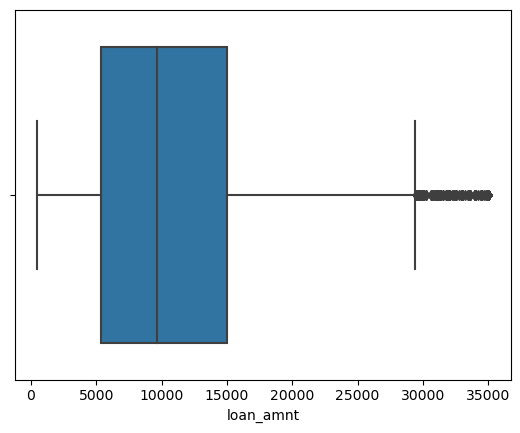

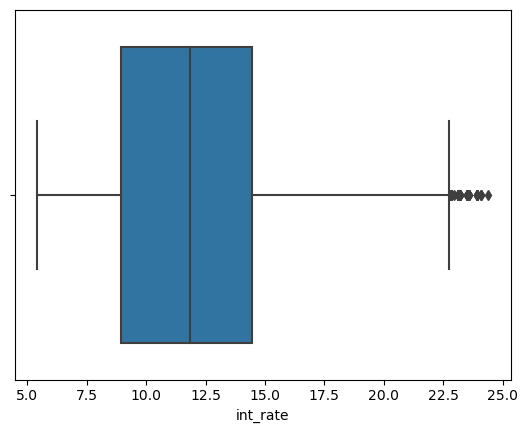

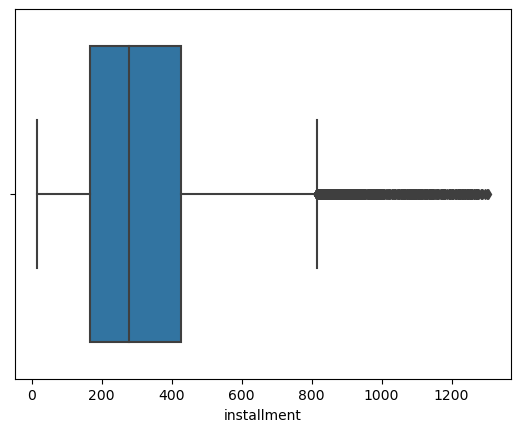

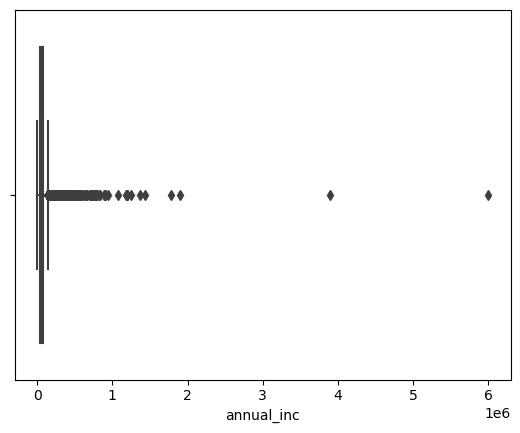

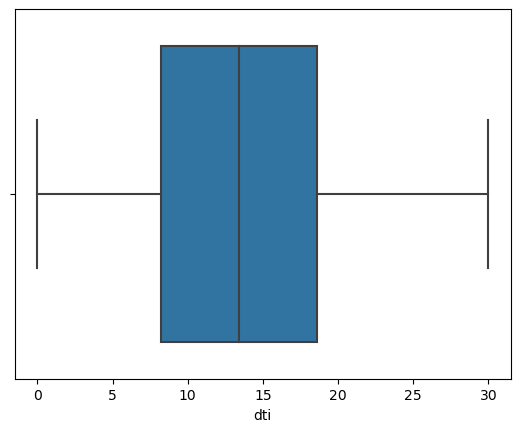

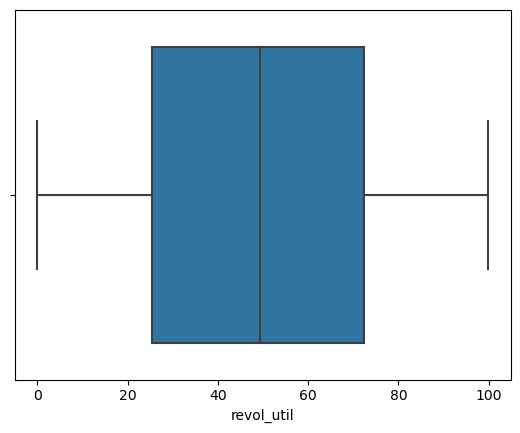

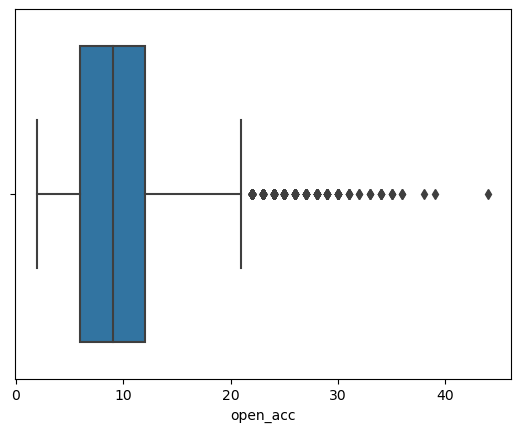

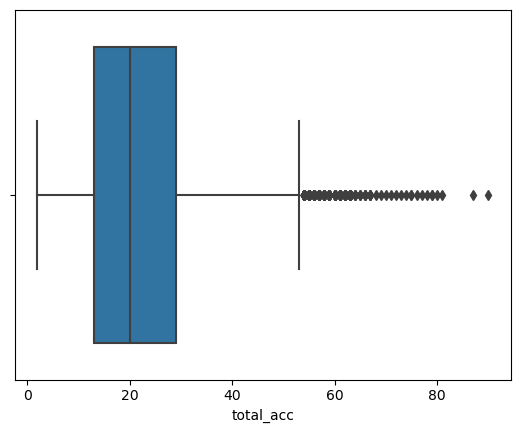

In [556]:
# Check for possible columns with outliers
#
numerical_cols = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_util', 'open_acc', 'total_acc'
]

for col in numerical_cols:
    sns.boxplot(x = df[col])
    plt.show()

loan_amnt       5375.00
int_rate           8.94
installment      165.82
annual_inc     40000.00
open_acc           6.00
total_acc         13.00
Name: 0.25, dtype: float64
loan_amnt      15000.00
int_rate          14.46
installment      425.55
annual_inc     82000.00
open_acc          12.00
total_acc         29.00
Name: 0.75, dtype: float64
percentage of rows removed: 10.24%


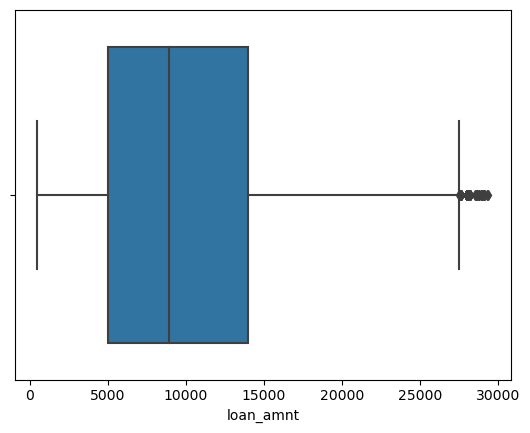

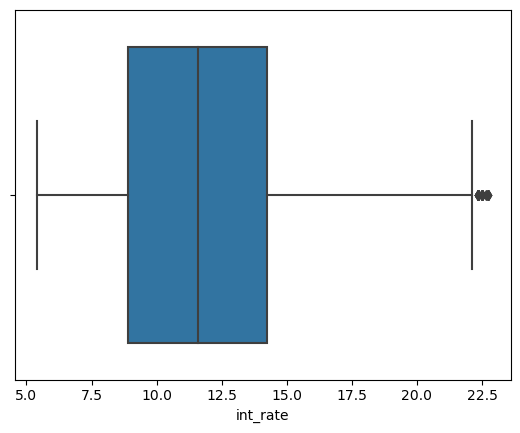

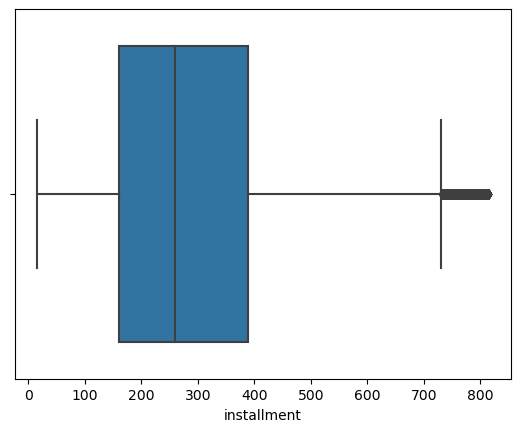

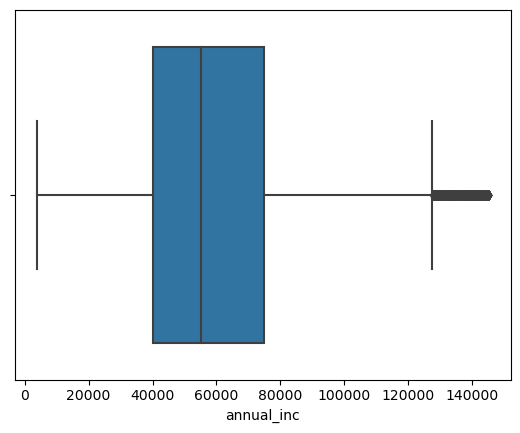

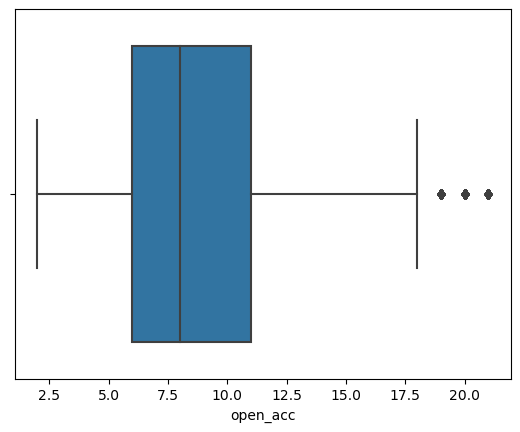

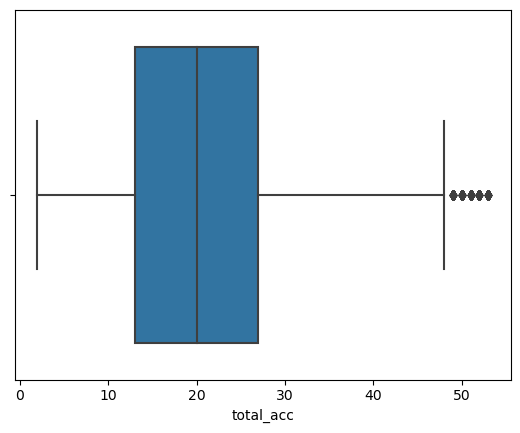

In [557]:
# From the above charts we identify the following columns with squeezed distribution due to outliers.
# Calculate SD and remove values which are away from mean by 2 times SD.

columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'open_acc', 'total_acc']

Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)

original_len = df.shape[0]
df = df[~((df[columns] < (Q1 - 1.5 * IQR)) |(df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
new_len = df.shape[0]
percentage = round((original_len - new_len) / original_len * 100, 2)

print("percentage of rows removed: " + str(percentage) + "%")

# Rechecking the plots to see distribution after removal of outliers
#
for col in columns:
    sns.boxplot(x = df[col])
    plt.show()


### Fix Invalid values

##### Correct date columns

In [558]:
# We will split the date columns as month and year to get more granular insights.
#
columns = ['issue_d', 'earliest_cr_line']

print("Following are the new columns added:")
print("------------------------------------")

for col in columns:
    month_col = str(col) + "_month"
    year_col = str(col) + "_year"

    df[[month_col, year_col]] = df[col].str.split('-', expand = True)
    df[year_col] = df[year_col].apply(lambda x: int(x) + 2000 if int(x) <= 23 else int(x) + 1900)
    
    print(month_col)
    print(year_col)
    
# Drop the original columns
df.drop(columns = columns, axis = 1, inplace = True)

Following are the new columns added:
------------------------------------
issue_d_month
issue_d_year
earliest_cr_line_month
earliest_cr_line_year


# Segregation

##### Segregate variables into unordered/ordered categorical and numerical based on number of unique values

In [559]:
# Separate columns into numerical and categorical
#
df.nunique()

loan_amnt                     792
term                            2
int_rate                      323
installment                 13337
grade                           7
sub_grade                      35
emp_length                     11
home_ownership                  4
annual_inc                   4541
verification_status             3
loan_status                     2
purpose                        14
zip_code                      806
addr_state                     49
dti                          2837
inq_last_6mths                  9
open_acc                       20
pub_rec                         5
revol_util                   1082
total_acc                      52
pub_rec_bankruptcies            3
desc_given                      2
total_rec_late_fee_given        2
issue_d_month                  12
issue_d_year                    5
earliest_cr_line_month         12
earliest_cr_line_year          53
dtype: int64

In [560]:
# Variables with more than 30-40 unique values are counted as numerical.
# Else, categorical.

# Variables where ordering their values does not make sense are Unordered Categorical.
#
unordered_categorical_cols = ['term', 'loan_status', 'addr_state', 'verification_status', 'issue_d_month',
    'home_ownership', 'purpose', 'earliest_cr_line_month', 'desc_given', 'total_rec_late_fee_given'
]

# Variables where ordering their values makes sense are Ordered Categorical.
#
ordered_categorical_cols = ['inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'grade', 'sub_grade', 
    'issue_d_year', 'emp_length', 'earliest_cr_line_year'
]

numerical_cols = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_util', 'open_acc',
    'total_acc'
]

##### Create necessary filtered dataframes for analysis

In [561]:
charged_off_df = df[df['loan_status'] == 'Charged Off']
charged_off_df.shape[0]

4899

# Univariate Analysis

**NOTE:** The following analysis covers **Derived Metrics** and **Segmented Univariate Analysis** as and when needed.
TThey will not be covered separately.

### Unordered Categorical Variables

In [562]:
def calculate_charged_off_percentage(group):
    total_count = len(group)
    filtered_count = len(group[group['loan_status'] == 'Charged Off'])  # Apply the desired filter
    percentage = filtered_count / total_count * 100
    return percentage

def charged_off_dist_plots(col, figsize = (8, 5), vertical = False):
    # Determine grid
    rows = 1
    cols = 2
    
    if vertical:
        rows = 2
        cols = 1
    
    # Plot univariate distribution
    fig, axes = plt.subplots(rows, cols, figsize = figsize)
    
    # Group by column
    df_grouped = df.groupby(col).size().reset_index(name = 'total')
    charged_off_df_grouped = charged_off_df.groupby(col).size().reset_index(name = 'charged off')

    # Merge two df groups into one
    df_merged = pd.merge(df_grouped, charged_off_df_grouped, on = col, how = 'outer')
    df_merged['charged off'].fillna(0, inplace = True)
    df_merged = df_merged.sort_values(by = 'total')

    # Plot the dataframe
    df_merged.plot(x = col, y = 'total', kind = 'bar', ax = axes[0], colormap = 'Paired')
    df_merged.plot(x = col, y = 'charged off', kind = 'bar', ax = axes[0], stacked = True)
    axes[0].set_title("Count Distribution for " + col)

    # Plot % of distribution in each segment
    grouped = df.groupby(col).apply(calculate_charged_off_percentage).sort_values()
    grouped.plot(kind = 'bar', ax = axes[1])
    axes[1].set_title("Charged Off % for " + col)
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Percentage')

    fig.tight_layout()
    fig.show()

##### Column: Term

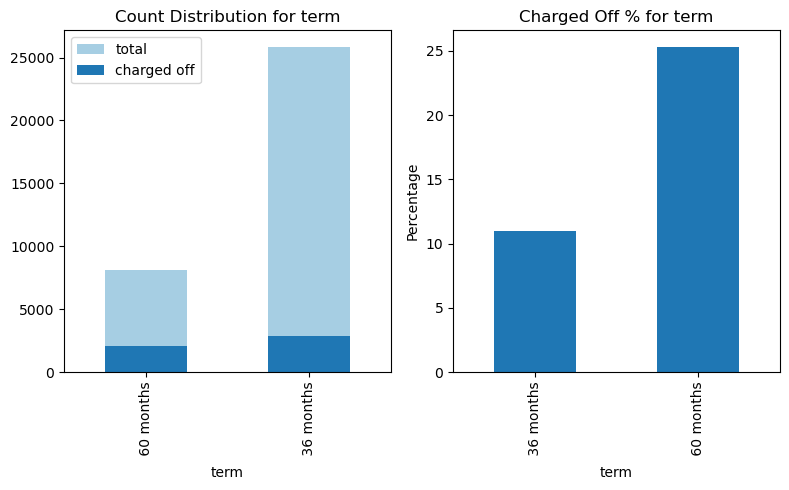

In [563]:
charged_off_dist_plots('term')

### Insights
There are almost thrice more loan takers for the term of 36 months with 15% less defaulters than 60 months term.

**Conclusion:**
- 36 Term is far more profitable.

##### Column: State Address

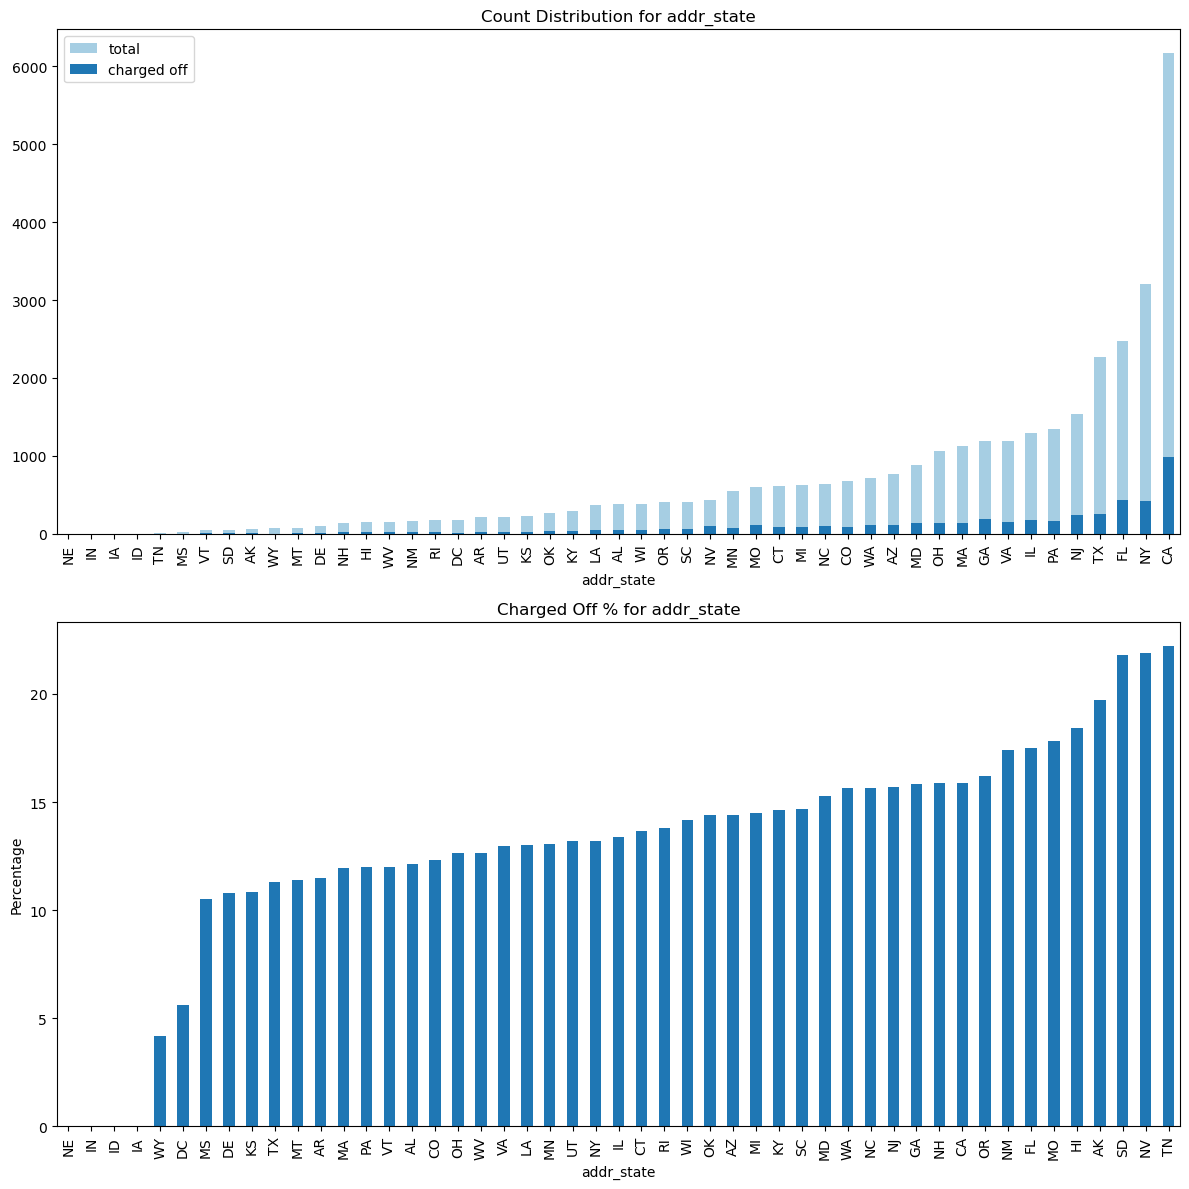

In [564]:
charged_off_dist_plots('addr_state', figsize = (12, 12), vertical = True)

### Insights
Interest rate for NY is less than 15% while CA goes above 15%.

**Conclusion:**
- NY is a better state for profitability than CA.
- AK, NV, SD, TN states should be avoided to issue loans due to very high default rate.

##### Column: Verification Status

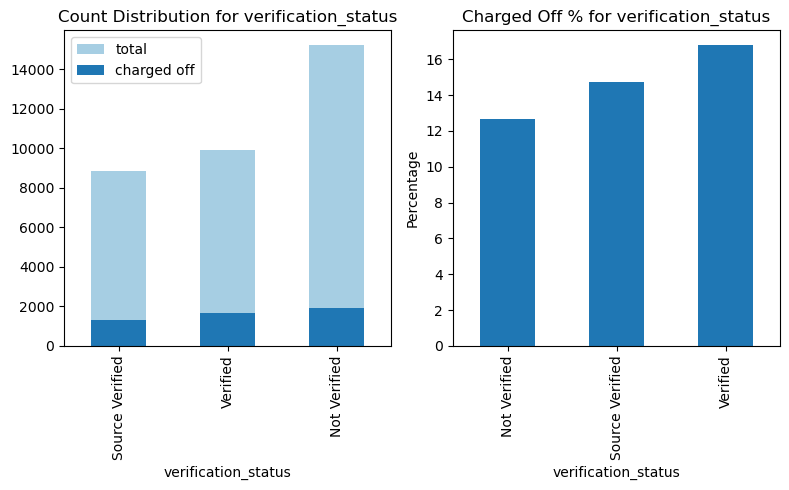

In [565]:
charged_off_dist_plots('verification_status')

### Insights
Percentage of defaulters are lower for Not Verified while having the most customer base.
This is very **counter intuitive**.

**Conclusion:**
- Verification does not necessarily lead to less defaults, instead Non Verified customers default less.

##### Column: Issue Date (Month)

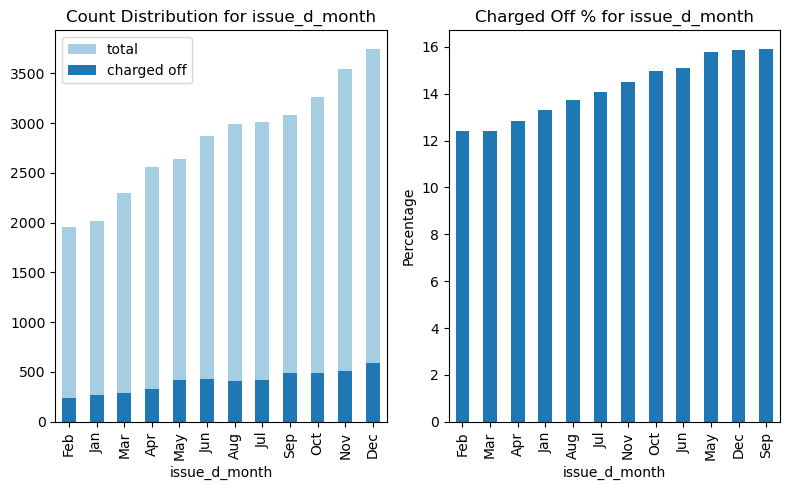

In [566]:
charged_off_dist_plots('issue_d_month')

### Insights
High defaults in mid year and at the end of year.

**Conclusion:**
- Possible reasons could be extra spending during Christmas holidays
- post FY year end cash crunch

##### Column: Home Ownership

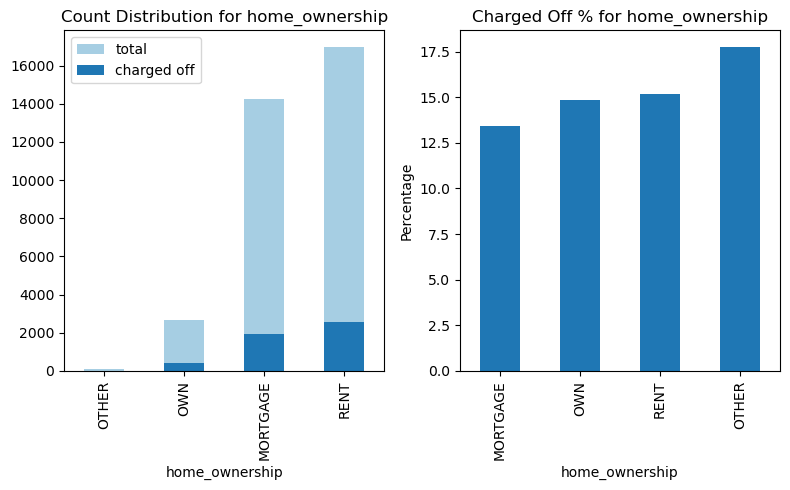

In [567]:
charged_off_dist_plots('home_ownership')

### Insights
Rent and Mortgage give almost similar business but Mortgage has less default percentage. 
Own and Others has very high default rate
while business is very less.

**Conclusion**:
- Invest more in Mortgage
- Avoid Own and Other

##### Column: Purpose

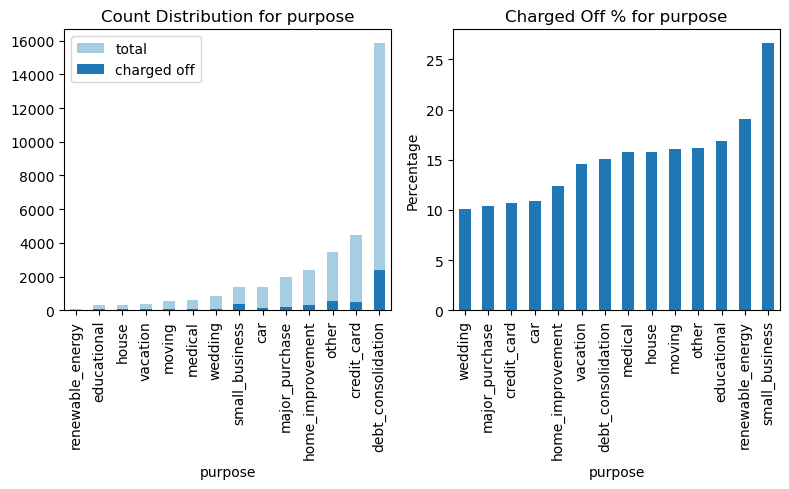

In [568]:
charged_off_dist_plots('purpose')

### Insights
Very high defaults for small business.
**Conclusion**:
- Avoid issuing loans to small businesses.

##### Column: Earliest Credit Line Month

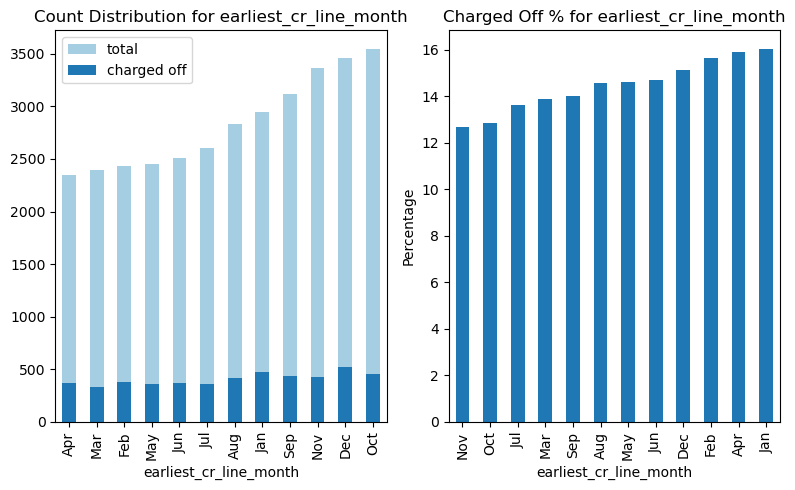

In [569]:
charged_off_dist_plots('earliest_cr_line_month')

### Insights

April has highest default percentage while giving least customers.

**Conclusion:**
- Avoid issueance where earliest credit line is in April

##### Column: Desciption provided

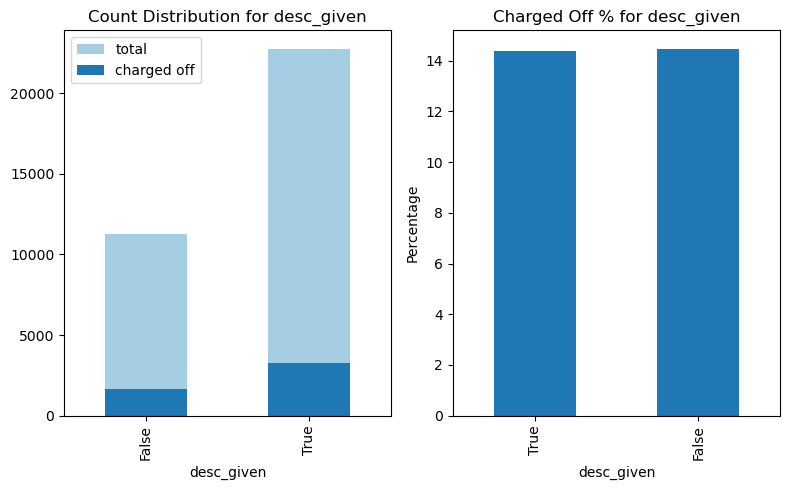

In [570]:
charged_off_dist_plots('desc_given')

### Insights

Both charge off percentage are equal whether description is given or not.

**Conclusion:**
- Description whether given or not does not determine the behaviour of defaulters.

##### Column: Is Late Fee Received

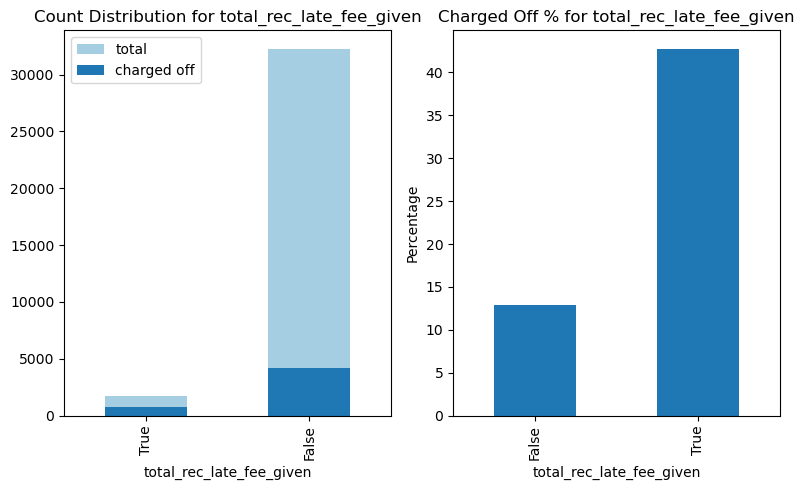

In [571]:
charged_off_dist_plots('total_rec_late_fee_given')

### Insights
Late fee payers have over 40% chance of defaulting.

**Conclusion:**
- Avoid issuing loans to those who pay late fees in any other instrument.

### Ordered Categorical Variable

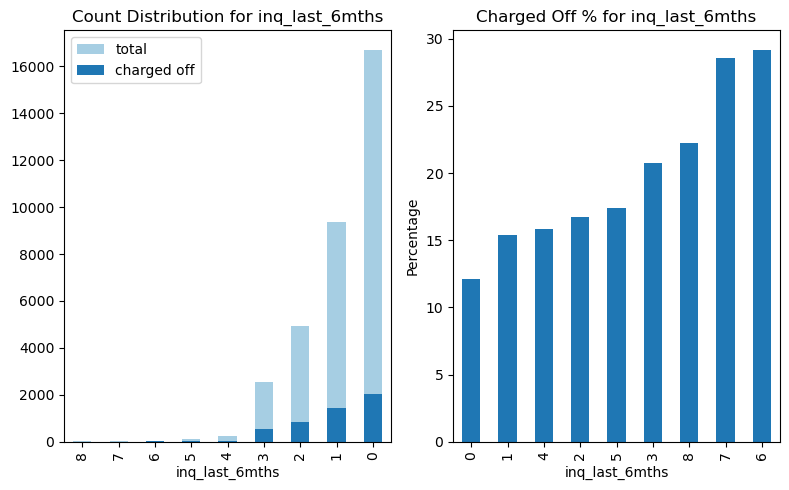

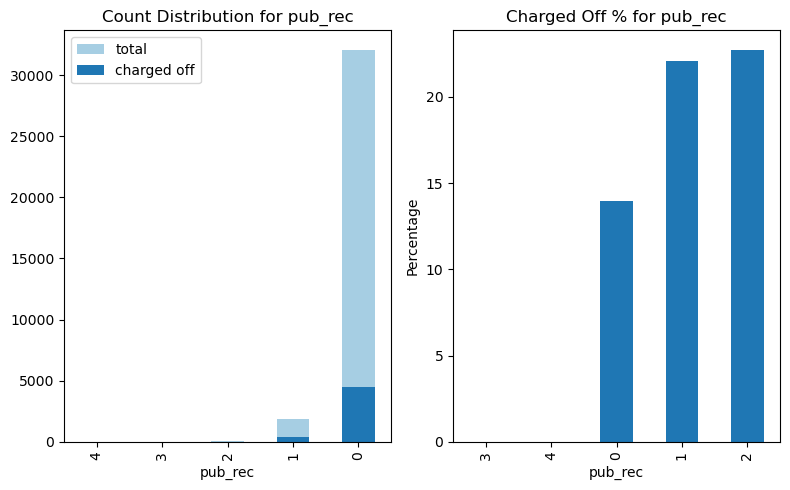

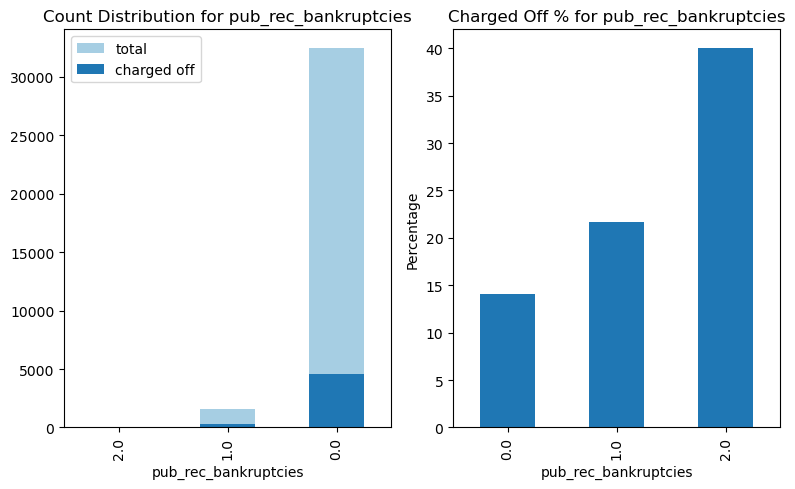

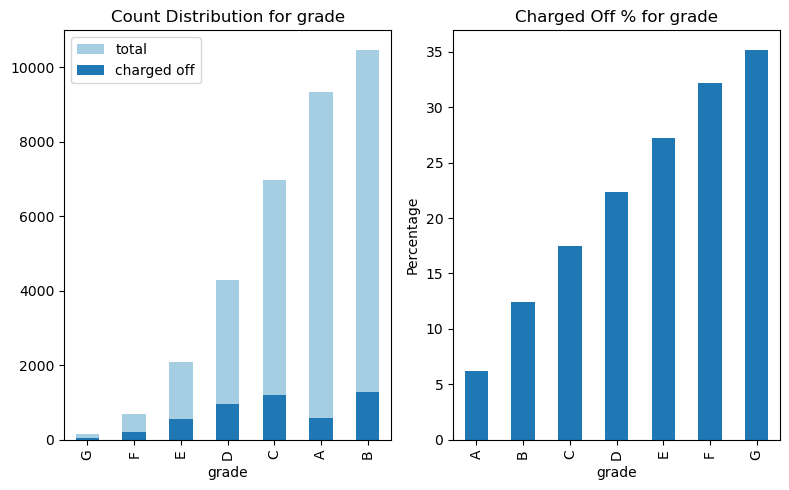

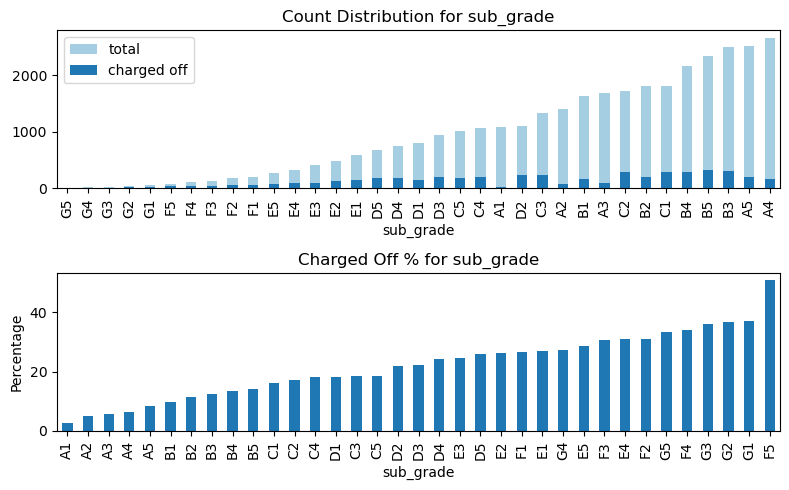

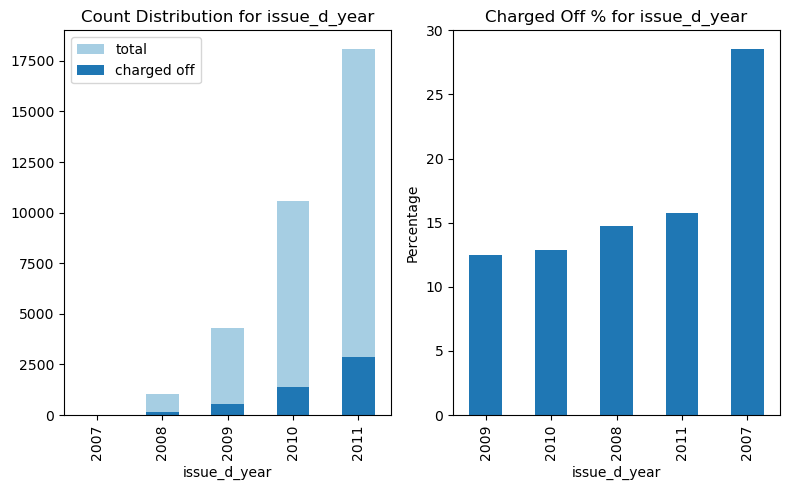

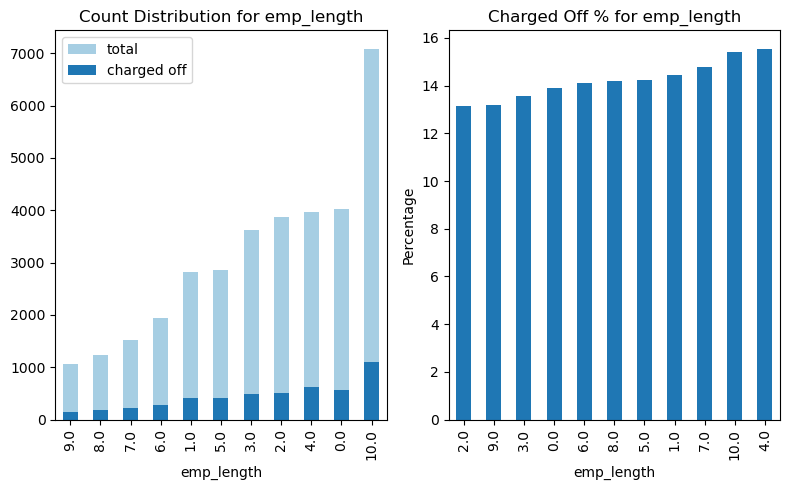

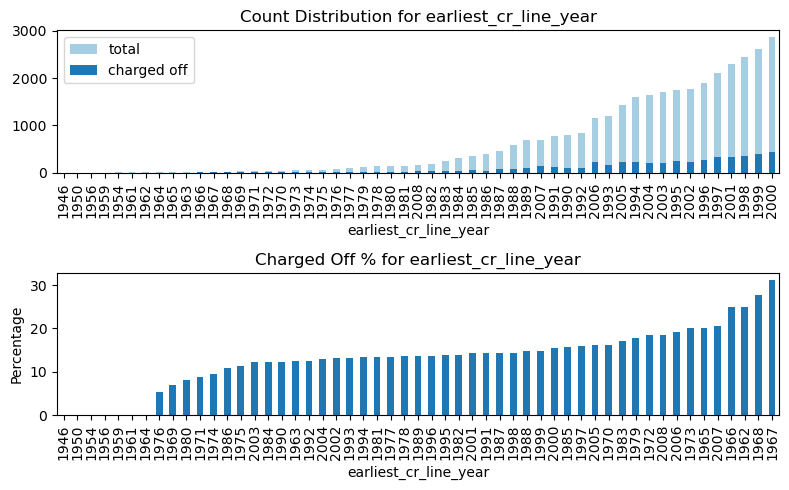

In [572]:
for col in ordered_categorical_cols:
    if col == 'sub_grade' or col == 'earliest_cr_line_year':
        charged_off_dist_plots(col, vertical = True)
    else:
        charged_off_dist_plots(col)

### Insights

**Column: Inquiries in past 6 months**
- There are large number of loan takers for which least number of inquiries are made.
- Percentage of defaulters is high for higher number of inquiries.
**Conclusion:**
- Very less number of defaulters where none or only one inquiry is made.

**Column: Public records and Bankruptcies**
- Almost 25% default rate where there is atleast 1 public record or recorded bankruptcies.
**Conclusion:**
- Issue loans only to those with no public records or bankruptcies.

**Column: Loan Grade**
- As grade of loan increases, percentage of defaulters go higher.
**Conclusion:**
- Do not issue loans of D E F G categories, they have over 20% default rate.

**Column: Issue Year**
- Highest default rate in 2007
**Conclusion:**
- This would be due to the Global financial crises.

**Column: Employement Length**
- Highest default rate with length of 4 years.
**Conclusion:**
- This would be due to high expenses in other factors in life such as marriage, house buying, car etc.

### Quantitative Variables

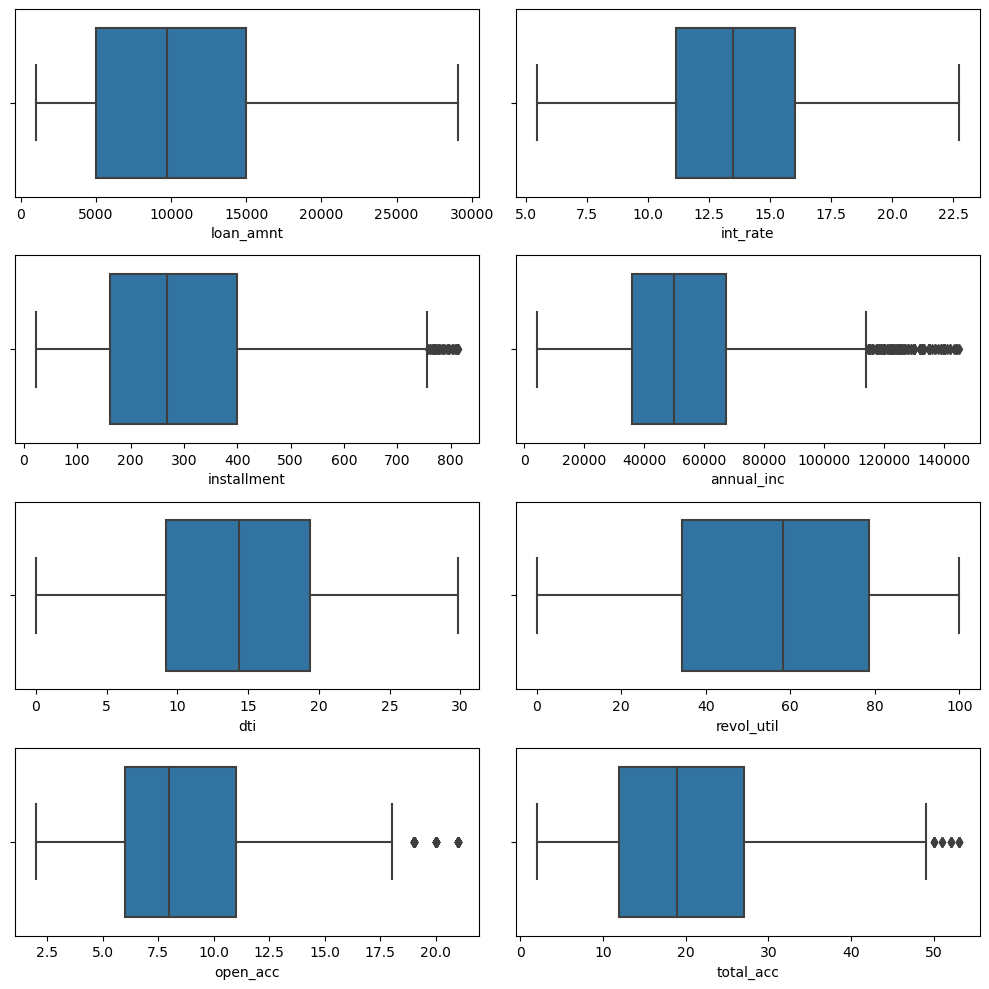

In [573]:
fig, axes = plt.subplots(round(len(numerical_cols) / 2), 2, figsize = (10, 10))
y = 0

for col in numerical_cols:
    i, j = divmod(y, 2)
    sns.boxplot(x = charged_off_df[col], ax = axes[i, j])
    y = y + 1
    
plt.tight_layout()
plt.show()

### Insights

**Conclusion: Majority of defaulters**
- issue loan between 5-15k
- have interest rate of 11-16 with median at 14
- have annual income between 3.5L to 7L
- have dti between 10-20
- have revolving line utilization rate btween 10-30
- have open credit line between 6-11

## Bivariate Analysis

### Numerical vs Numerical

##### Loan Amount vs Interest Rate for Charged Off

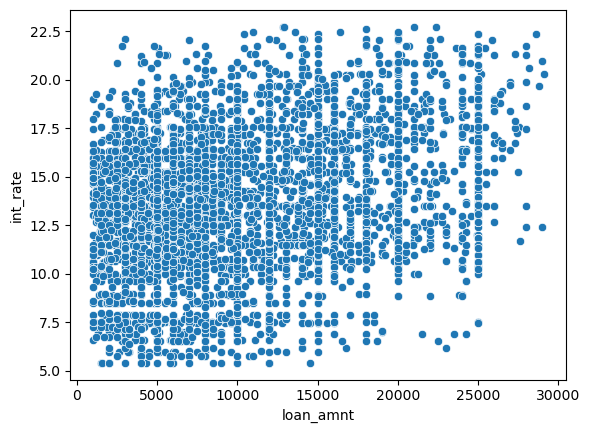

In [574]:
# This plot is used to check if two columns have positive/negative or no relationship
#
sns.scatterplot(x = charged_off_df["loan_amnt"], y = charged_off_df["int_rate"])
plt.show()

### Insights
The density of defaulters is high when loan amount is between 2k-7k with interest rates ranging from 11-15%.

**Conclusion:**
- For smaller loan amounts interest rates should be kept very high to avoid defaults.

##### Loan Amount vs Annual Income for Charged Off

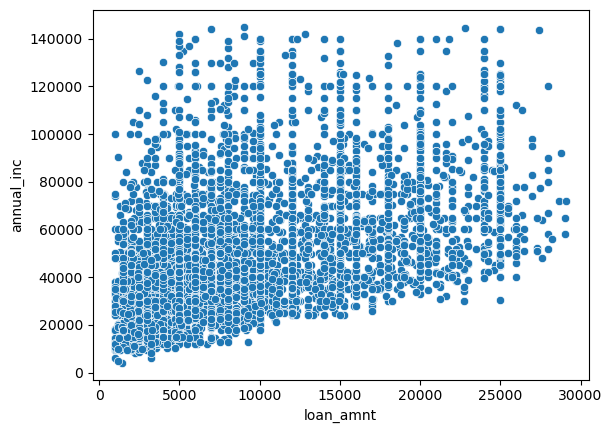

In [575]:
sns.scatterplot(x = charged_off_df["loan_amnt"], y = charged_off_df["annual_inc"])
plt.show()

### Insights
Very high density of low income and low loan amount. Reason for this needs to be understood with other variables.

**Conclusion:**
- Avoid issuing low loan amounts to low income customer.

##### Loan Amount vs DTI for Charged Off

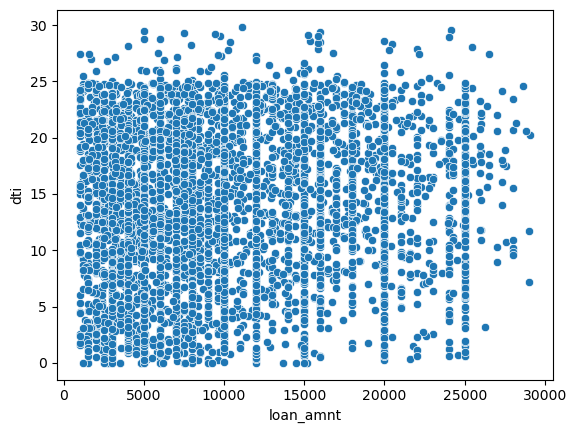

In [576]:
sns.scatterplot(x = charged_off_df["loan_amnt"], y = charged_off_df["dti"])
plt.show()

### Insight
There is no relation evident.

##### Annual Income vs Interest Rate for Charged Off

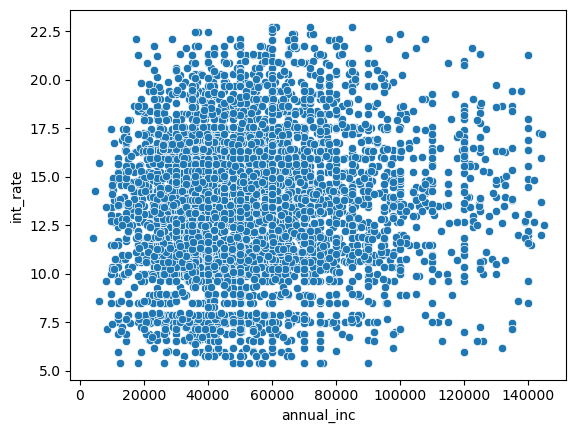

In [577]:
sns.scatterplot(x = charged_off_df["annual_inc"], y = charged_off_df["int_rate"])
plt.show()

### Insights
There is high density of defaulters for mid range interest rate and lower side annual income.

**Conclusion:**
- For lower annual income customers, as interest rate increases, defaults increase.

### Numerical vs Categorical

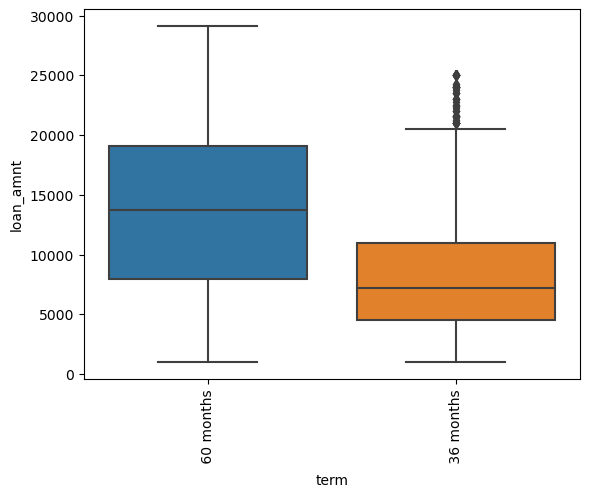

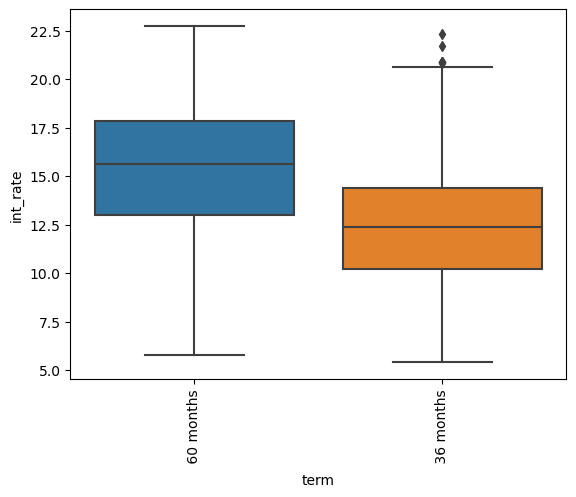

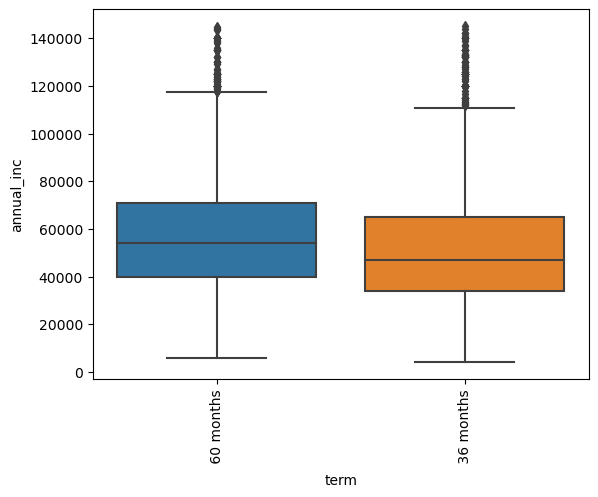

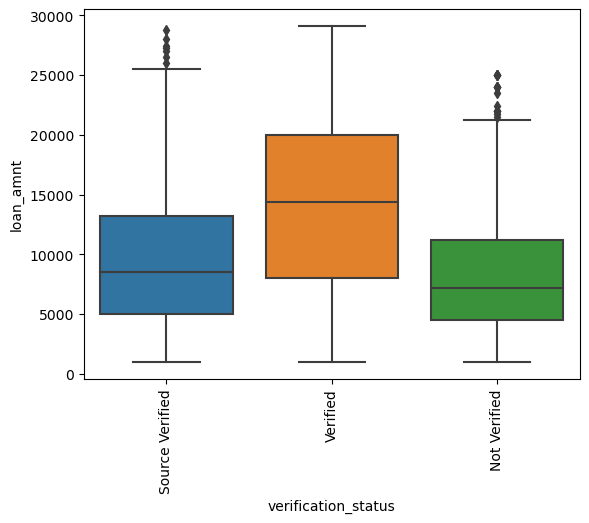

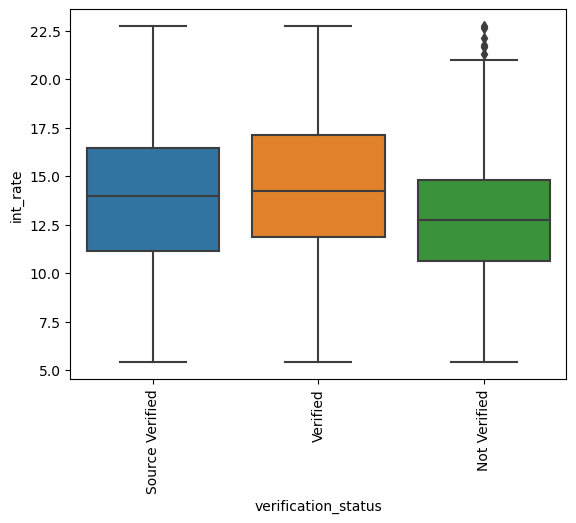

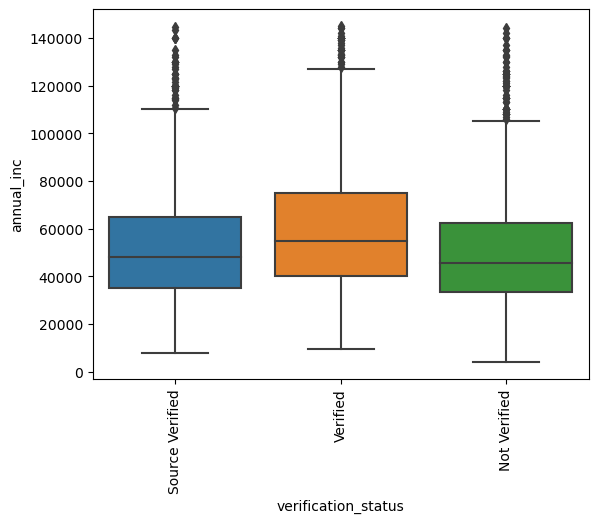

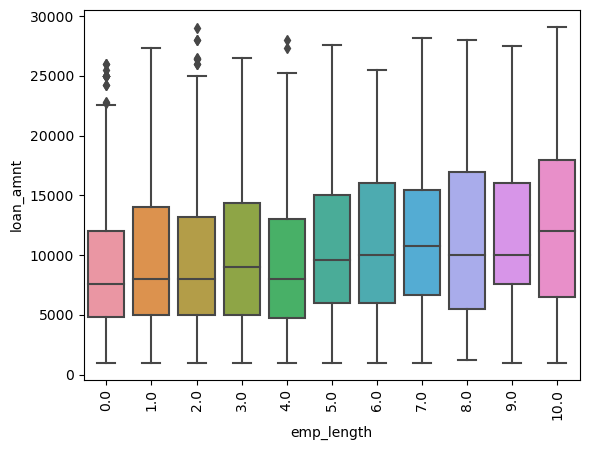

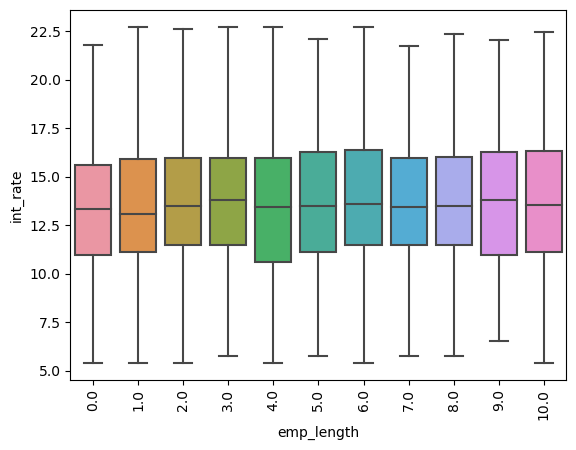

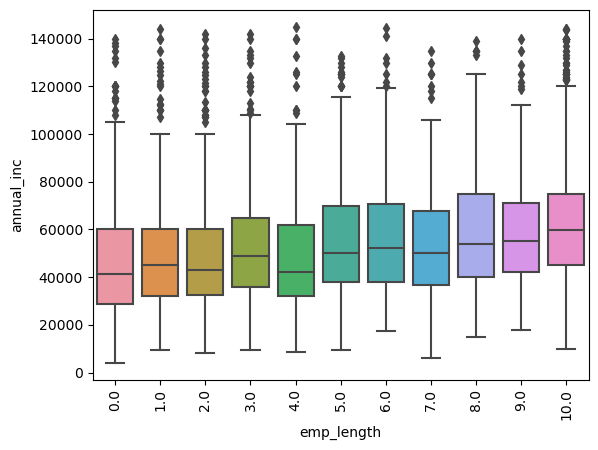

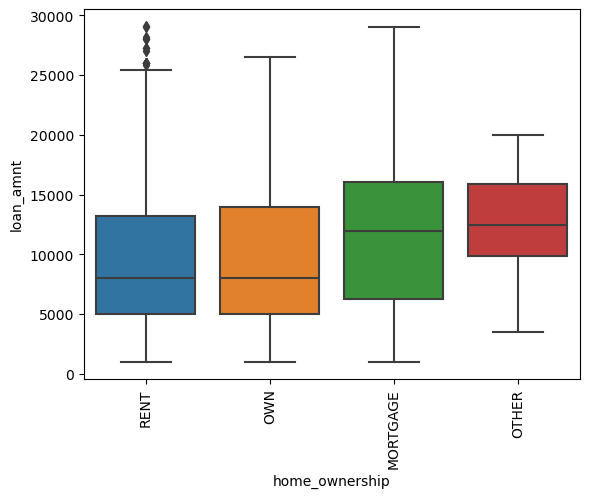

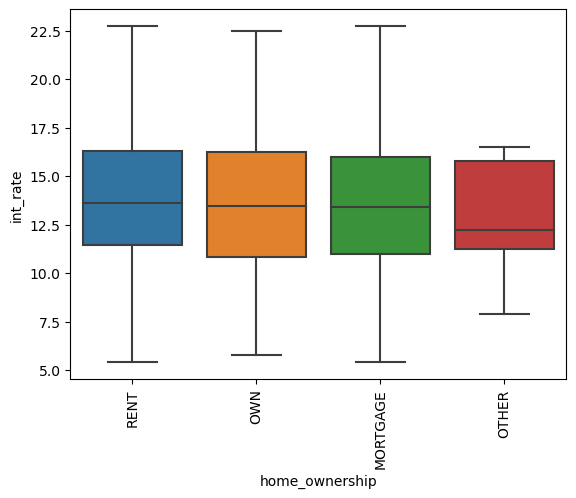

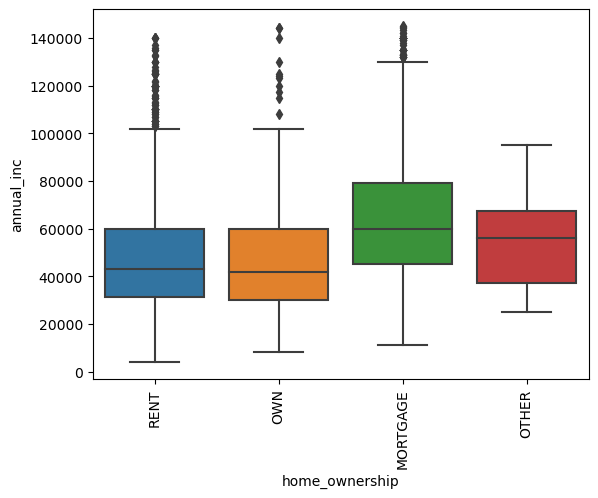

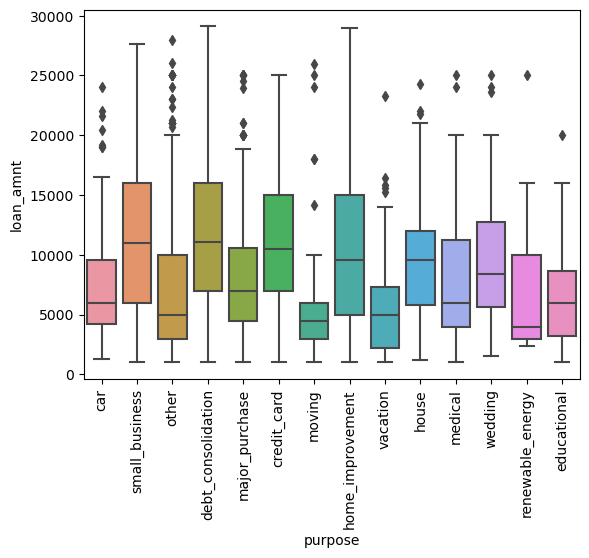

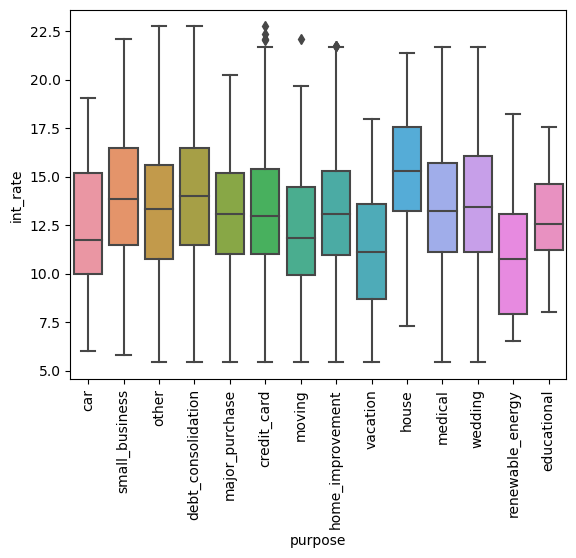

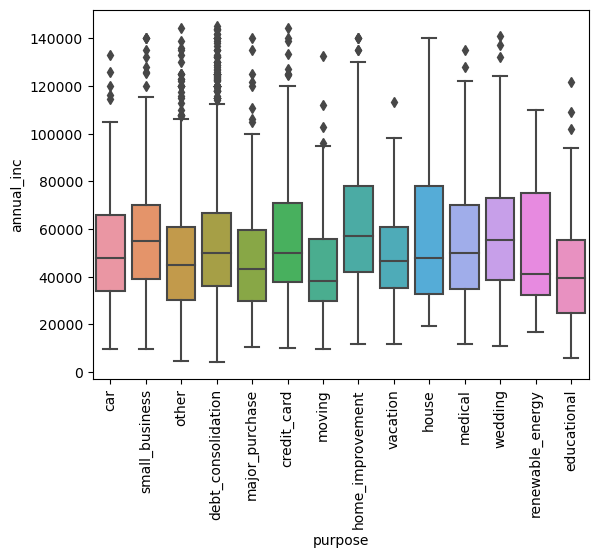

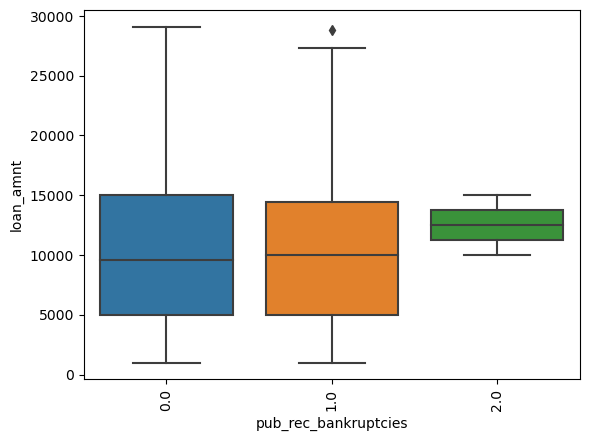

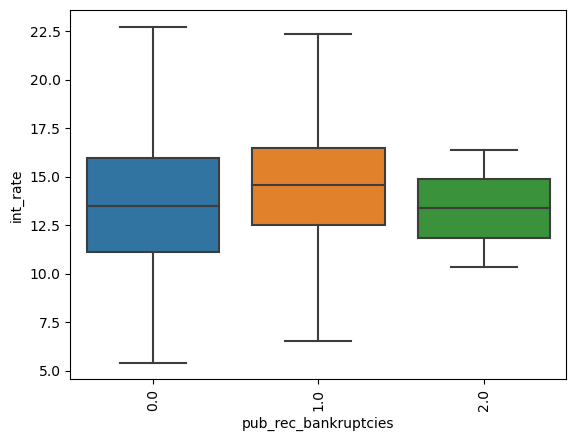

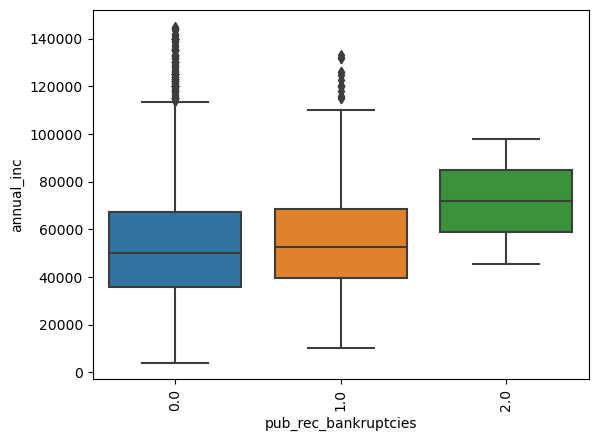

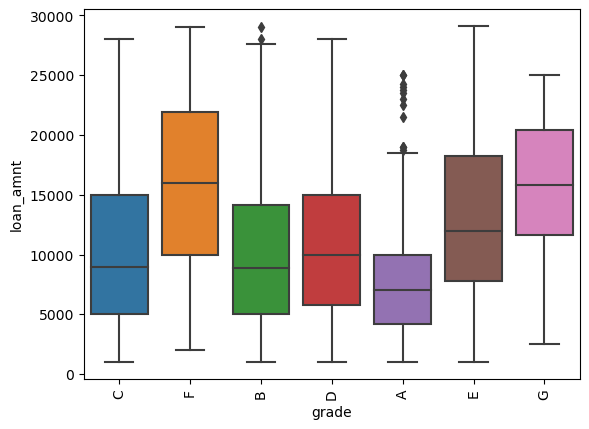

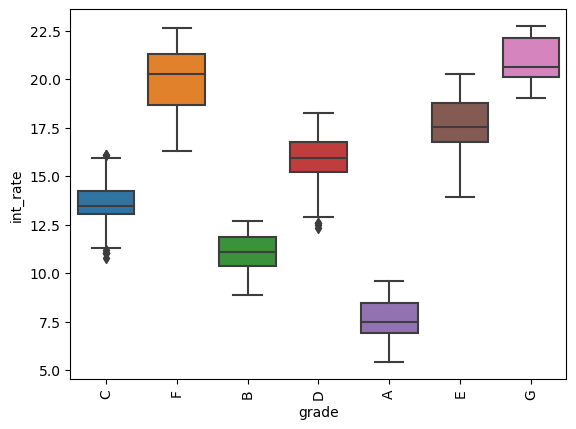

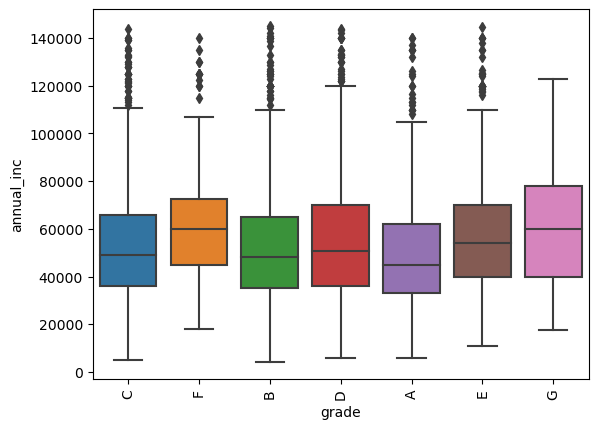

In [578]:
categorical_cols = ['term', 'verification_status', 'emp_length',
    'home_ownership', 'purpose', 'pub_rec_bankruptcies', 'grade'
]

numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc']

for c_col in categorical_cols:
    for n_col in numerical_cols:
        plt.xticks(rotation = 90)
        sns.boxplot(x = charged_off_df[c_col], y = charged_off_df[n_col])
        plt.show()

### Insights
For all defaulters:
- 60 term have issued very high loan amounts compared to 36 term. While annual income of both categories is almost similar.
- As employment duration increases, median for default loan amount also increases, despite the interest rate being quite similar for all.
- Strange to see median annual income for employment duration 0-10 increases very gradually for defaulters.
- Median Interest rate for Home Owner with “Other” is very low while their Loan Default Amount is higher than others.
- Defaults median of Loan Amount, Interest rate, and Annual Income for the purpose of “Renewable Energy” is very low.
- Interest Rates for Grade E, F, G are very high making loan defaults higher while having similar annual income.

**Conclusion:**
- Do not issue loans for 60 term when income is similar to 36 term.
- Do not issue loans to customers with higher employment duration yet having lower income (less than 6).
- Increase interest rates for Home Owner with “Other” category.
- Do not issue E, F, G loans for customers having income less than 6.

## Multivariate Analysis

### Numerical vs Numerical

In [579]:
numerical_cols = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_util', 'open_acc', 'total_acc'
]

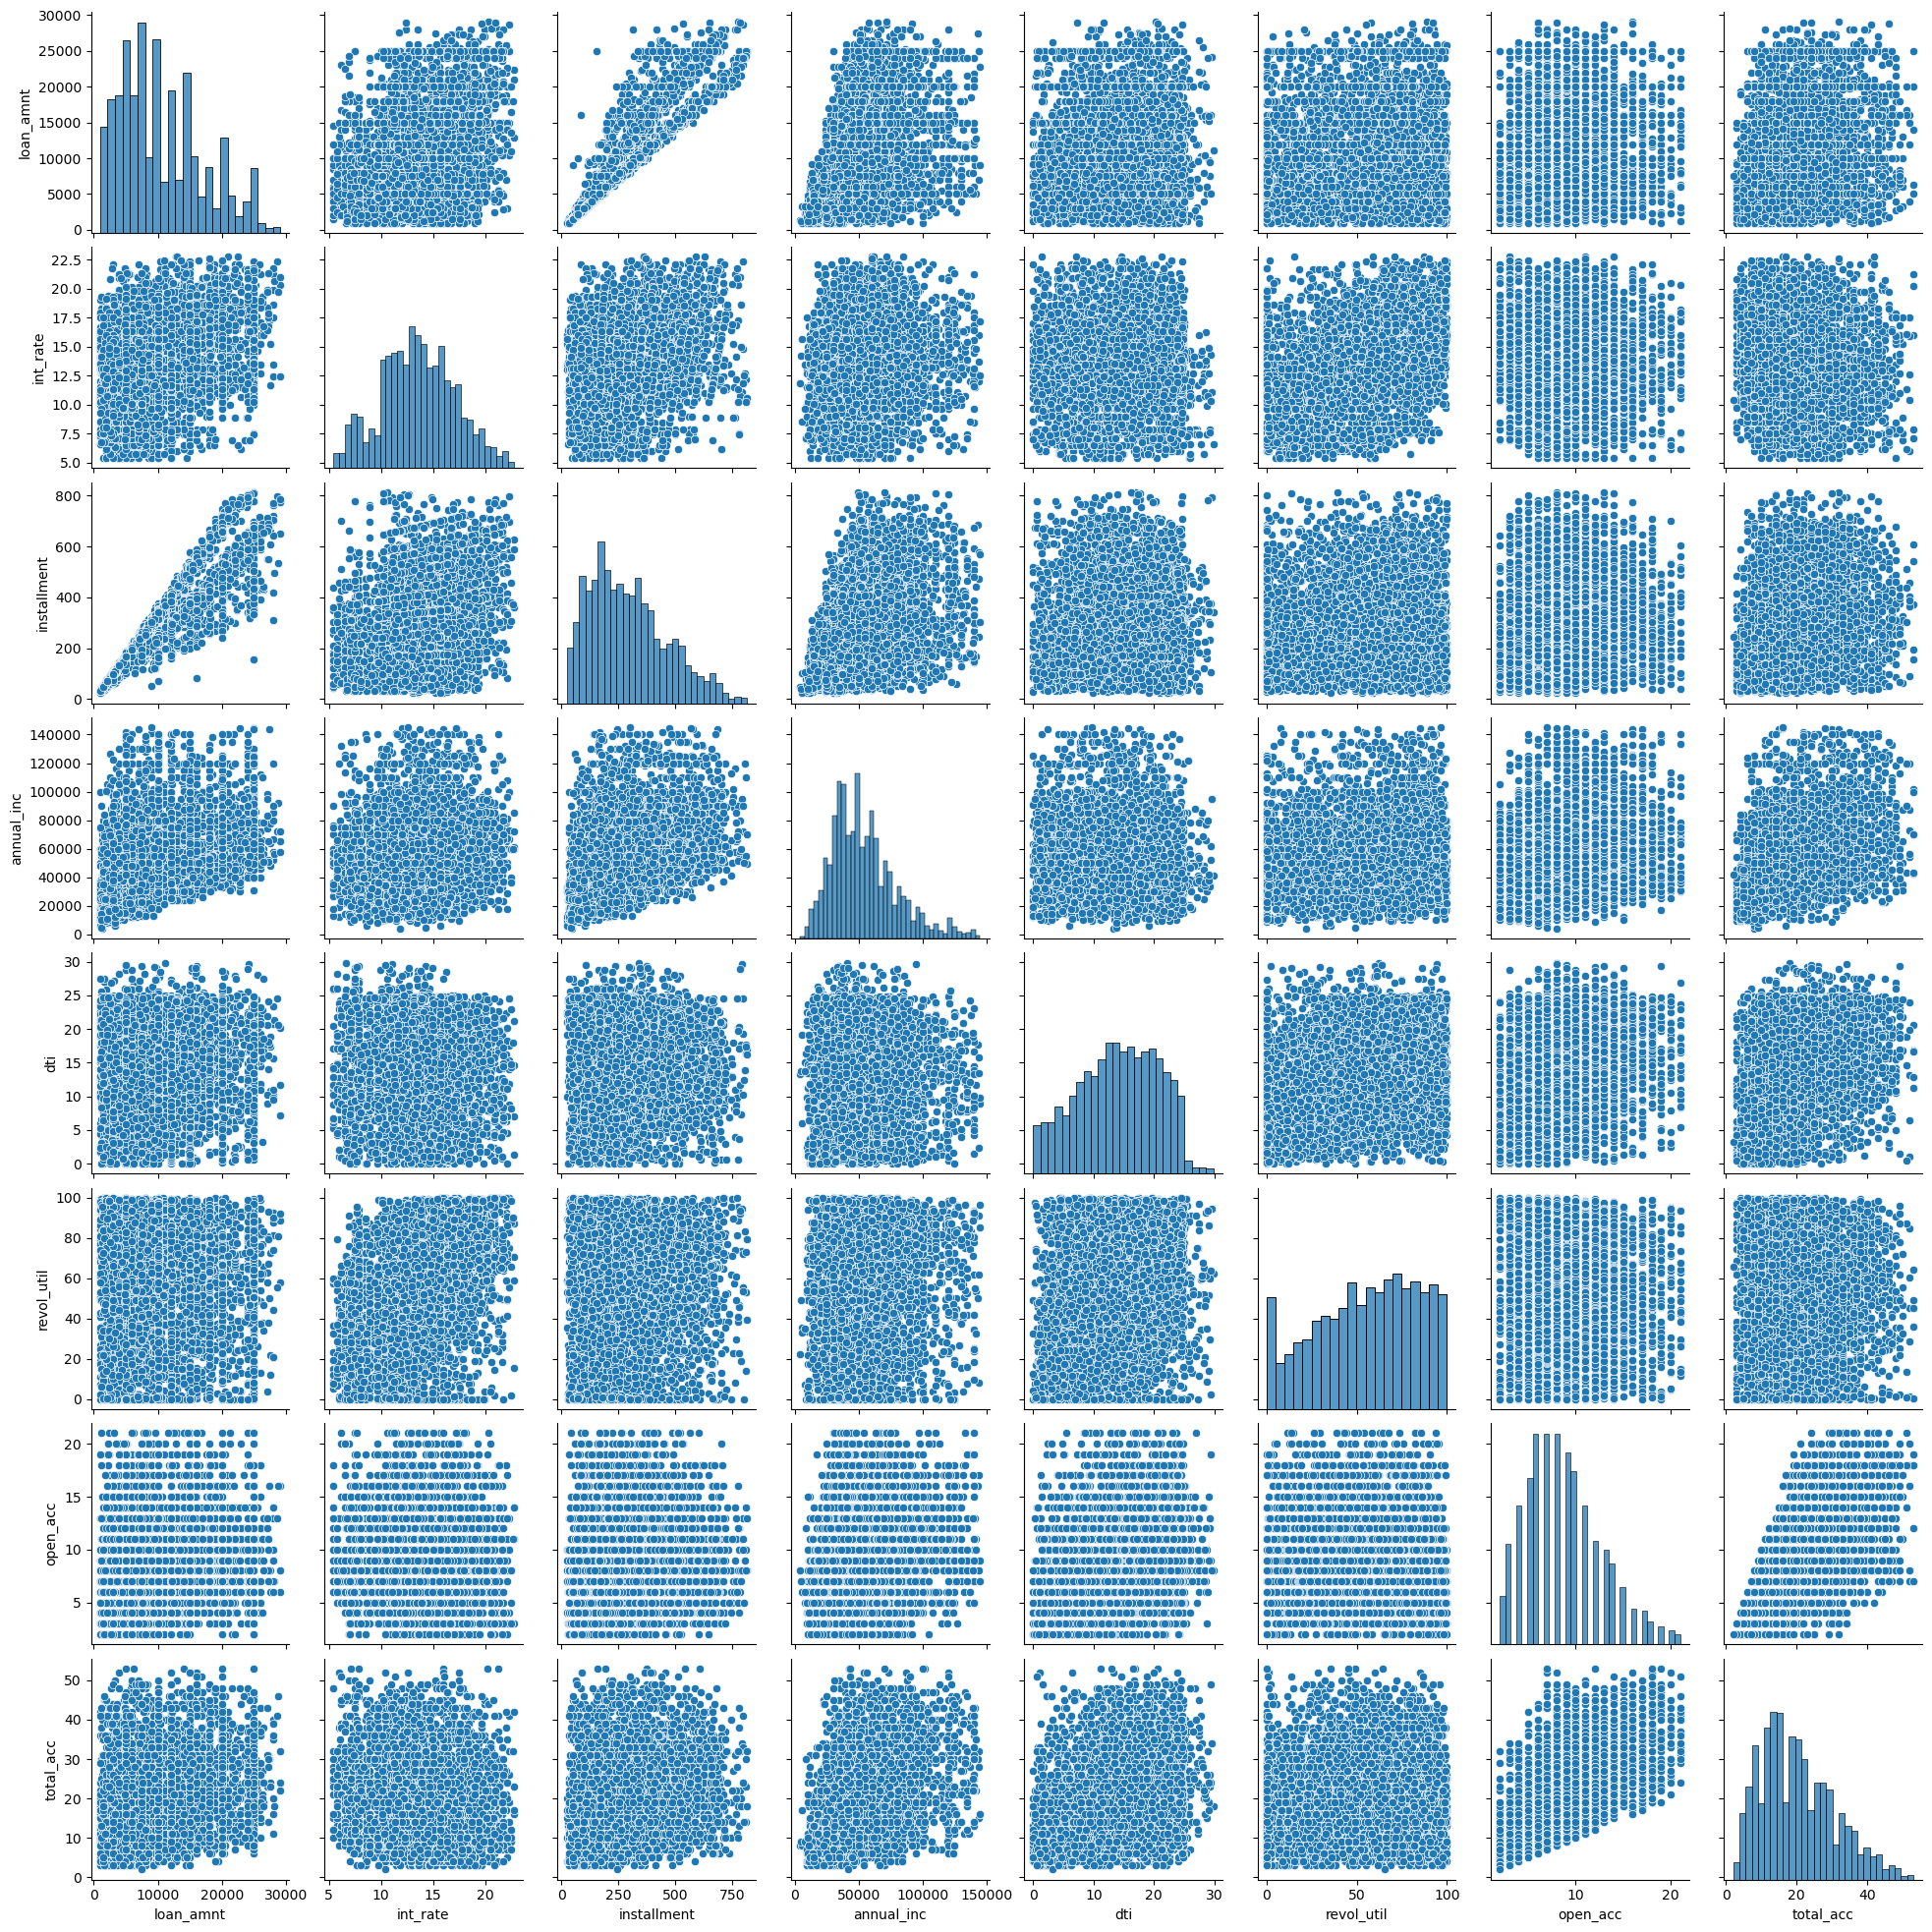

In [580]:
sns.pairplot(charged_off_df[numerical_cols])
plt.show()

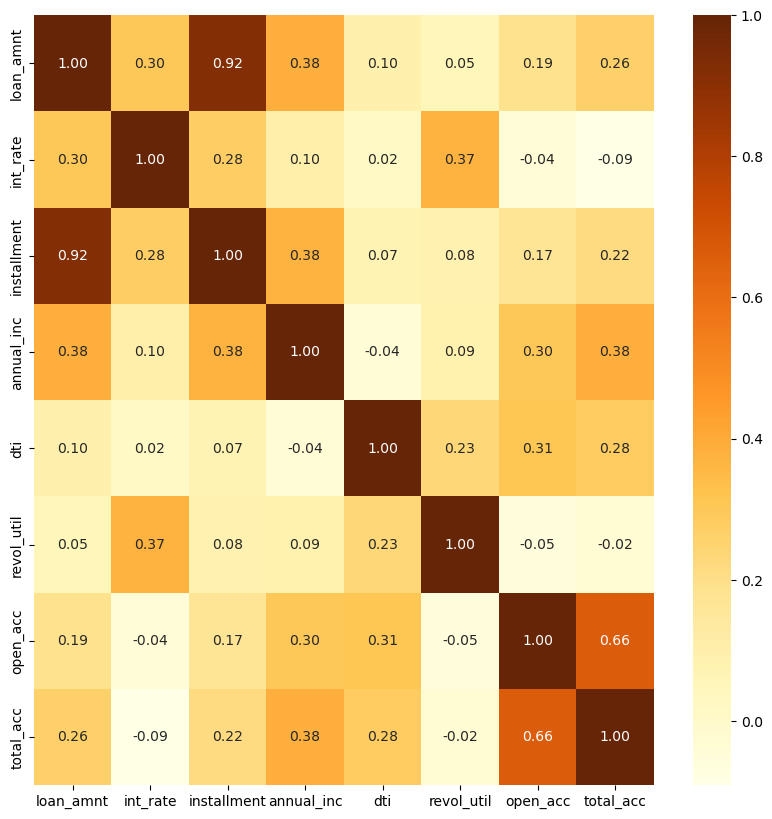

In [581]:
numerical_df = charged_off_df[numerical_cols]

plt.figure(figsize = (10, 10))
sns.heatmap(numerical_df.corr(), annot = True, fmt = '.2f', cmap = "YlOrBr")
plt.show()

### Insights
For all defaulters,
- Loan amount and Interest rate have correlation of only 0.3 which suggests interest rate can be increased 
for higher loan amounts.
- Annual income and Loan Amount have 0.38 correlation. So give higher loans only for very high annual income customers.

### Categorical vs Categorical

In [582]:
categorical_cols = ['term', 'verification_status', 'emp_length',
    'home_ownership', 'purpose', 'pub_rec_bankruptcies', 'grade'
]

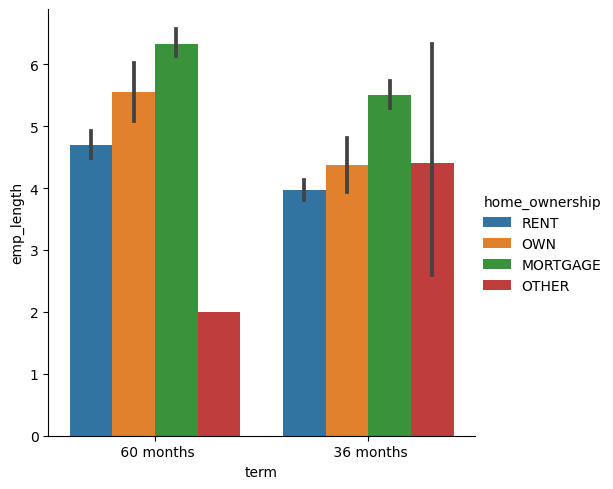

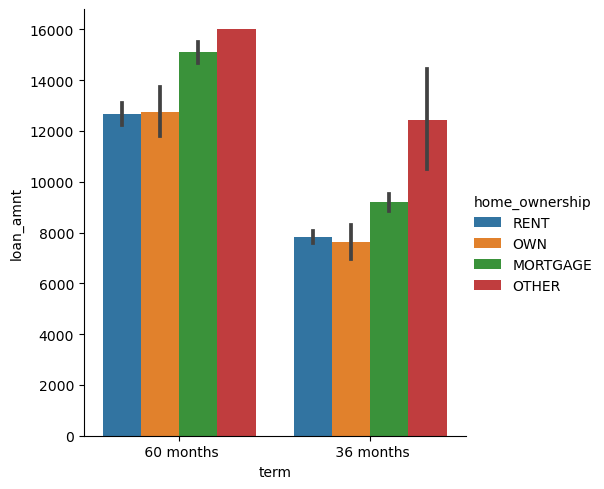

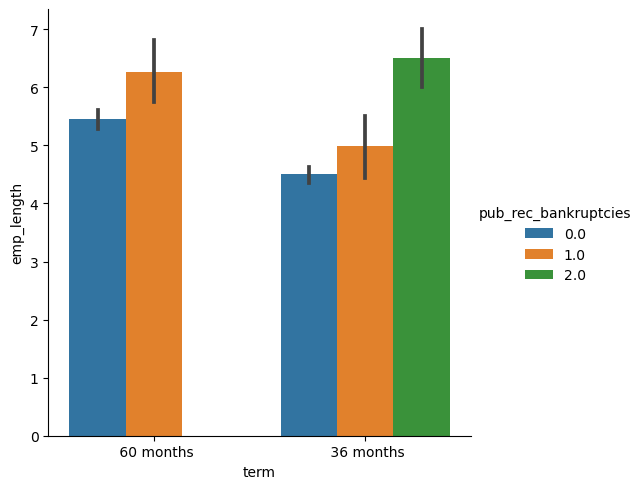

In [583]:
sns.catplot(x='term', y='emp_length', hue='home_ownership', data=charged_off_df, kind='bar')
plt.show()

sns.catplot(x='term', y='loan_amnt', hue='home_ownership', data=charged_off_df, kind='bar')
plt.show()

sns.catplot(x='term', y='emp_length', hue='pub_rec_bankruptcies', data=charged_off_df, kind='bar')
plt.show()

## Insights
- For 60 Term, there are no defaulters when loan is for Home Ownership "Other" category while employment length is > 2.